In [1]:
import pandas as pd
import numpy as np

# Fusión, unión y concatenación

Hay 3 formas principales de combinar DataFrames: Fusionar (pd.merge), Unir (pd.join) y Concatenar (pd.concat). En esta clase discutiremos estos 3 métodos con ejemplos.

In [2]:
#np.random.randint(valor_menor, valor_mayor, (filas, columnas))

In [3]:
df1 = pd.DataFrame(np.random.randint(100, 200, (3, 3)),
                      columns = ['enero','febrero','diciembre'],
                      index=list(range(2010,2013)))

In [4]:
df2 = pd.DataFrame(np.random.randint(100, 200, (3, 3)),
                      columns = ['enero','febrero','diciembre'],
                      index=list(range(2013,2016)))

In [5]:
df3 = pd.DataFrame(np.random.randint(100, 200, (3, 3)),
                      columns = ['enero','febrero','diciembre'],
                      index=list(range(2016,2019)))

In [6]:
df1

,enero,febrero,diciembre
2010,183,152,146
2011,121,174,150
2012,146,108,154


In [7]:
df2

,enero,febrero,diciembre
2013,100,111,170
2014,156,163,122
2015,193,101,199


In [8]:
df3

,enero,febrero,diciembre
2016,134,130,188
2017,147,150,156
2018,190,190,138


## Concatenación

La concatenación básicamente une DataFrames. Tenga en cuenta que las dimensiones deben coincidir a lo largo del eje en el que está concatenando. Puede usar **pd.concat** y pasar una lista de DataFrames para concatenar juntos:

In [9]:
pd.concat([df1,df2,df3])

,enero,febrero,diciembre
2010,183,152,146
2011,121,174,150
2012,146,108,154
2013,100,111,170
2014,156,163,122
2015,193,101,199
2016,134,130,188
2017,147,150,156
2018,190,190,138


In [10]:
pd.concat([df1,df2,df3],axis=1)

,enero,febrero,diciembre,enero,febrero,diciembre,enero,febrero,diciembre
2010,183.0,152.0,146.0,NaN,NaN,NaN,NaN,NaN,NaN
2011,121.0,174.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN
2012,146.0,108.0,154.0,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,100.0,111.0,170.0,NaN,NaN,NaN
2014,NaN,NaN,NaN,156.0,163.0,122.0,NaN,NaN,NaN
2015,NaN,NaN,NaN,193.0,101.0,199.0,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,134.0,130.0,188.0
2017,NaN,NaN,NaN,NaN,NaN,NaN,147.0,150.0,156.0
2018,NaN,NaN,NaN,NaN,NaN,NaN,190.0,190.0,138.0


## DataFrames de ejemplos

In [11]:
ventas = pd.DataFrame({'id_cliente': ['A1','A2','A3'],
                       'ventas': [250, 375, 500],
                       'costo': [155, 175, 200]})

In [12]:
clientes = pd.DataFrame({'id_cliente': ['A1','A2','A3'],
                         'edad': [25, 37, 50],
                         'sucursal': ['x','y','z']})

In [13]:
ventas

,id_cliente,ventas,costo
0,A1,250,155
1,A2,375,175
2,A3,500,200


In [14]:
clientes

,id_cliente,edad,sucursal
0,A1,25,x
1,A2,37,y
2,A3,50,z


## Fusionando

La función **Merge** le permite fusionar DataFrames utilizando una lógica similar a la de fusionar (joins) tablas SQL. Por ejemplo:

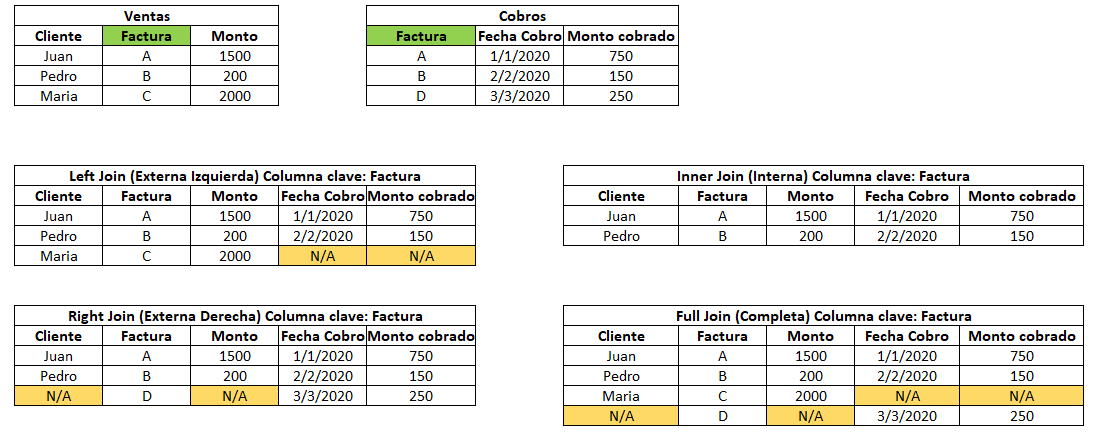

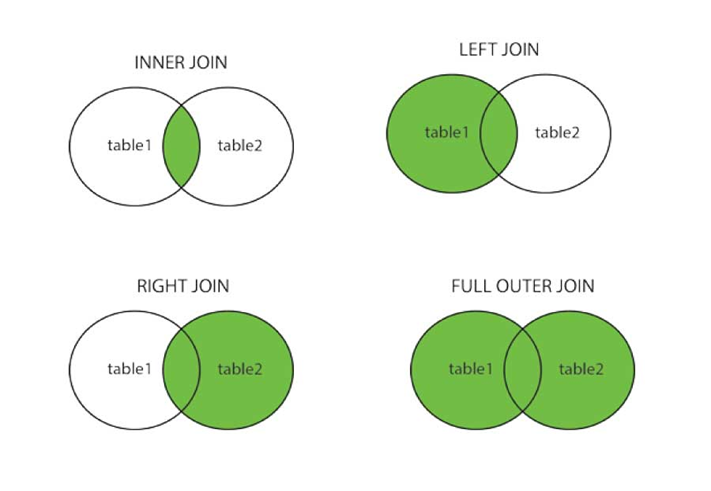

In [15]:
pd.merge(ventas,clientes, on = 'id_cliente', how='inner')

,id_cliente,ventas,costo,edad,sucursal
0,A1,250,155,25,x
1,A2,375,175,37,y
2,A3,500,200,50,z


Un ejemplo un poco más complicado:

In [16]:
ventas = pd.DataFrame({'id_vendedor': ['A1','A1','A2','A3'],
                       'año': [2015, 2016, 2015, 2016],
                       'ventas': [250, 375, 500, 350],
                       'costo': [155, 175, 200, 110]})

In [17]:
vendedores = pd.DataFrame({'id_vendedor': ['A1','A2','A2','A3'],
                           'año': [2015, 2015, 2016, 2015],
                           'edad': [25, 37, 50, 21],
                           'sucursal': ['x', 'y', 'z', 'w']})

In [18]:
pd.merge(ventas, vendedores, on=['id_vendedor', 'año'])

,id_vendedor,año,ventas,costo,edad,sucursal
0,A1,2015,250,155,25,x
1,A2,2015,500,200,37,y


In [19]:
pd.merge(ventas, vendedores, on=['id_vendedor', 'año'], how='outer')

,id_vendedor,año,ventas,costo,edad,sucursal
0,A1,2015,250.0,155.0,25.0,x
1,A1,2016,375.0,175.0,NaN,NaN
2,A2,2015,500.0,200.0,37.0,y
3,A3,2016,350.0,110.0,NaN,NaN
4,A2,2016,NaN,NaN,50.0,z
5,A3,2015,NaN,NaN,21.0,w


In [20]:
pd.merge(ventas, vendedores, on=['id_vendedor', 'año'], how='right')

,id_vendedor,año,ventas,costo,edad,sucursal
0,A1,2015,250.0,155.0,25,x
1,A2,2015,500.0,200.0,37,y
2,A2,2016,NaN,NaN,50,z
3,A3,2015,NaN,NaN,21,w


In [21]:
pd.merge(ventas, vendedores, on=['id_vendedor', 'año'], how='left')

,id_vendedor,año,ventas,costo,edad,sucursal
0,A1,2015,250,155,25.0,x
1,A1,2016,375,175,NaN,NaN
2,A2,2015,500,200,37.0,y
3,A3,2016,350,110,NaN,NaN


## Uniendo (Joining)
Unirse (join) es un método conveniente para combinar las columnas de dos DataFrames indexados potencialmente de manera diferente en un DataFrame de resultado único.

In [22]:
ventas1 = pd.DataFrame({'enero': [115, 150, 189],
                        'febrero': [250, 358, 291]},
                       index = ['A1','A2','A3']) #vendedores

In [23]:
ventas2 = pd.DataFrame({'marzo': [250, 375, 500],
                        'abril': [155, 175, 200]},
                       index = ['A1','A2','A4']) #vendedores

In [24]:
ventas1.join(ventas2)

,enero,febrero,marzo,abril
A1,115,250,250.0,155.0
A2,150,358,375.0,175.0
A3,189,291,NaN,NaN


In [25]:
ventas1.join(ventas2, how='outer')

,enero,febrero,marzo,abril
A1,115.0,250.0,250.0,155.0
A2,150.0,358.0,375.0,175.0
A3,189.0,291.0,NaN,NaN
A4,NaN,NaN,500.0,200.0


# Accesor de partes de una fecha en series

In [26]:
data_fechas = {'fecha_recibido':['2021-08-11 23:11:40',
                                 '2021-08-12 19:12:35',
                                 '2021-08-01 14:51:45',
                                 '2021-06-01 17:14:23',
                                 '2021-10-11 18:32:25',
                                 '2021-08-17 21:22:28'],
               'fecha_despacho':['2022-08-13 23:12:53',
                                 '2023-08-14 20:12:47',
                                 '2021-08-04 19:09:15',
                                 '2025-06-05 18:22:09',
                                 '2024-10-12 19:08:14',
                                 '2023-08-19 22:12:27']}

df_fechas = pd.DataFrame(data_fechas)

In [27]:
df_fechas

,fecha_recibido,fecha_despacho
0,2021-08-11 23:11:40,2022-08-13 23:12:53
1,2021-08-12 19:12:35,2023-08-14 20:12:47
2,2021-08-01 14:51:45,2021-08-04 19:09:15
3,2021-06-01 17:14:23,2025-06-05 18:22:09
4,2021-10-11 18:32:25,2024-10-12 19:08:14
5,2021-08-17 21:22:28,2023-08-19 22:12:27


In [28]:
df_fechas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   fecha_recibido  6 non-null      object
 1   fecha_despacho  6 non-null      object
dtypes: object(2)
memory usage: 224.0+ bytes


In [29]:
df_fechas['fecha_recibido_'] = pd.to_datetime(df_fechas['fecha_recibido'])
df_fechas['fecha_despacho_'] = pd.to_datetime(df_fechas['fecha_despacho'])

In [30]:
df_fechas

,fecha_recibido,fecha_despacho,fecha_recibido_,fecha_despacho_
0,2021-08-11 23:11:40,2022-08-13 23:12:53,2021-08-11 23:11:40,2022-08-13 23:12:53
1,2021-08-12 19:12:35,2023-08-14 20:12:47,2021-08-12 19:12:35,2023-08-14 20:12:47
2,2021-08-01 14:51:45,2021-08-04 19:09:15,2021-08-01 14:51:45,2021-08-04 19:09:15
3,2021-06-01 17:14:23,2025-06-05 18:22:09,2021-06-01 17:14:23,2025-06-05 18:22:09
4,2021-10-11 18:32:25,2024-10-12 19:08:14,2021-10-11 18:32:25,2024-10-12 19:08:14
5,2021-08-17 21:22:28,2023-08-19 22:12:27,2021-08-17 21:22:28,2023-08-19 22:12:27


In [31]:
df_fechas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   fecha_recibido   6 non-null      object        
 1   fecha_despacho   6 non-null      object        
 2   fecha_recibido_  6 non-null      datetime64[ns]
 3   fecha_despacho_  6 non-null      datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 320.0+ bytes


In [32]:
df_fechas['fecha_recibido_'].dt

In [33]:
df_fechas['fecha_despacho_'].dt

In [34]:
try:
    df_fechas['fecha_despacho'].dt
except:
    print('No es un tipo de dato fecha')

No es un tipo de dato fecha


In [35]:
df_fechas['fecha_recibido_'].dt.year

0    2021
1    2021
2    2021
3    2021
4    2021
5    2021
Name: fecha_recibido_, dtype: int64

In [36]:
df_fechas['fecha_recibido_'].dt.month

0     8
1     8
2     8
3     6
4    10
5     8
Name: fecha_recibido_, dtype: int64

In [37]:
df_fechas['fecha_recibido_'].dt.day

0    11
1    12
2     1
3     1
4    11
5    17
Name: fecha_recibido_, dtype: int64

In [38]:
df_fechas['fecha_recibido_'].dt.hour

0    23
1    19
2    14
3    17
4    18
5    21
Name: fecha_recibido_, dtype: int64

In [39]:
df_fechas['fecha_recibido_'].dt.minute

0    11
1    12
2    51
3    14
4    32
5    22
Name: fecha_recibido_, dtype: int64

In [40]:
df_fechas['fecha_recibido_'].dt.second

0    40
1    35
2    45
3    23
4    25
5    28
Name: fecha_recibido_, dtype: int64

# Operaciones con fechas

In [41]:
df_fechas['diferencia'] = df_fechas['fecha_despacho_'] - df_fechas['fecha_recibido_']

In [42]:
#objeto > Timestamp
type(df_fechas['fecha_despacho_'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [43]:
#objeto > Timedelta
type(df_fechas['diferencia'][0])

pandas._libs.tslibs.timedeltas.Timedelta

In [44]:
df_fechas['diferencia']

0    367 days 00:01:13
1    732 days 01:00:12
2      3 days 04:17:30
3   1465 days 01:07:46
4   1097 days 00:35:49
5    732 days 00:49:59
Name: diferencia, dtype: timedelta64[ns]

In [45]:
#siempre da la información en días
df_fechas['diferencia'][0]

Timedelta('367 days 00:01:13')

In [46]:
#dias
df_fechas['diferencia'].apply(lambda x: x.days)

0     367
1     732
2       3
3    1465
4    1097
5     732
Name: diferencia, dtype: int64

In [47]:
#años
df_fechas['diferencia'].apply(lambda x: x.days)/365

0    1.005479
1    2.005479
2    0.008219
3    4.013699
4    3.005479
5    2.005479
Name: diferencia, dtype: float64

In [48]:
#meses
df_fechas['diferencia'].apply(lambda x: x.days)/30

0    12.233333
1    24.400000
2     0.100000
3    48.833333
4    36.566667
5    24.400000
Name: diferencia, dtype: float64

In [49]:
#segundos
round(df_fechas['diferencia'].apply(lambda x: x.total_seconds()),2)

0     31708873.0
1     63248412.0
2       274650.0
3    126580066.0
4     94782949.0
5     63247799.0
Name: diferencia, dtype: float64

In [50]:
#minutos
round(df_fechas['diferencia'].apply(lambda x: x.total_seconds())/60,2)

0     528481.22
1    1054140.20
2       4577.50
3    2109667.77
4    1579715.82
5    1054129.98
Name: diferencia, dtype: float64

In [51]:
#horas
df_fechas['diferencia'].apply(lambda x: x.total_seconds())/60/60

0     8808.020278
1    17569.003333
2       76.291667
3    35161.129444
4    26328.596944
5    17568.833056
Name: diferencia, dtype: float64

In [52]:
df_fechas.sort_values(by='fecha_recibido_', ascending=True, inplace=True)

In [53]:
#fijese que el indice original se mantiene para cada fila
df_fechas

,fecha_recibido,fecha_despacho,fecha_recibido_,fecha_despacho_,diferencia
3,2021-06-01 17:14:23,2025-06-05 18:22:09,2021-06-01 17:14:23,2025-06-05 18:22:09,1465 days 01:07:46
2,2021-08-01 14:51:45,2021-08-04 19:09:15,2021-08-01 14:51:45,2021-08-04 19:09:15,3 days 04:17:30
0,2021-08-11 23:11:40,2022-08-13 23:12:53,2021-08-11 23:11:40,2022-08-13 23:12:53,367 days 00:01:13
1,2021-08-12 19:12:35,2023-08-14 20:12:47,2021-08-12 19:12:35,2023-08-14 20:12:47,732 days 01:00:12
5,2021-08-17 21:22:28,2023-08-19 22:12:27,2021-08-17 21:22:28,2023-08-19 22:12:27,732 days 00:49:59
4,2021-10-11 18:32:25,2024-10-12 19:08:14,2021-10-11 18:32:25,2024-10-12 19:08:14,1097 days 00:35:49


# Ejercicio

Del siguiente modelo de datos: 

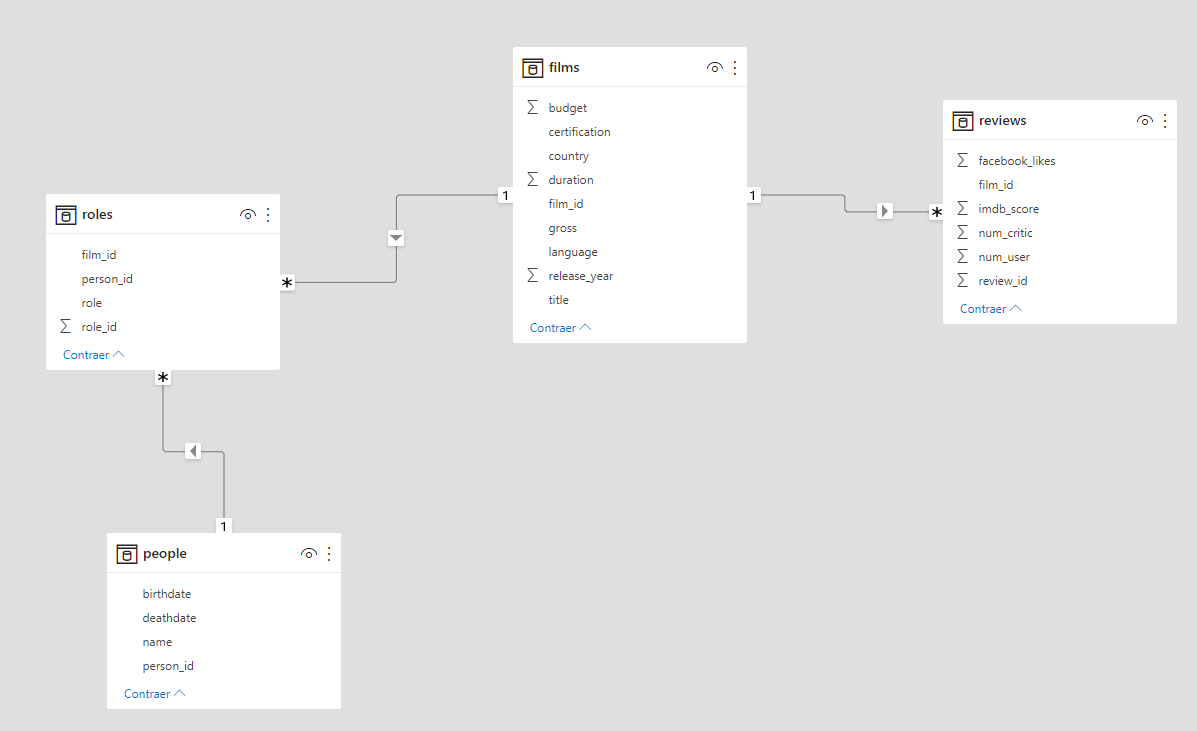

**Haga los siguientes ejercicios:**

Los datos estan en el archivo peliculas.xlsx
 
- Cree 1 dataframe llamado films conectandose al archivo peliculas.xlsx, especificamente a la hoja films (sheet_name='films') 

- Cree 1 dataframe llamado people conectandose al archivo peliculas.xlsx, especificamente a la hoja people (sheet_name='people')

- Cree 1 dataframe llamado reviews conectandose al archivo peliculas.xlsx, especificamente a la hoja reviews (sheet_name='reviews')

- Cree 1 dataframe llamado roles conectandose al archivo peliculas.xlsx, especificamente a la hoja roles (sheet_name='roles')

- Cree una tabla llamada tabla_1 que contenga las columnas: film_id, title, release_year, num_critic
 
- De la tabla creada cree una que permita analizar el num_critic promedio por title
 
- Cree una tabla llamada tabla_2 que contenga las columnas: film_id, person_id, role, name, facebook_likes, num_critic
 
- De la tabla_2, cree una tabla que solo tenga los datos de Clint Eastwood, es decir que filtrara esta tabla por la columna name con el nombre dado, y llamará esa tabla: tabla_clint

- De la tabla_clint cree un pivote que permita analizar el name como indice, el role como columna, num_critic promedio y facebook_likes promedio como values.

***Para hacer este ejercicio usaras la funcion merge, recuerda especificar el tipo de merge (how)***

In [54]:
films = pd.read_excel('peliculas.xlsx', sheet_name='films')
people = pd.read_excel('peliculas.xlsx', sheet_name='people')
reviews = pd.read_excel('peliculas.xlsx', sheet_name='reviews')
roles = pd.read_excel('peliculas.xlsx', sheet_name='roles')

In [55]:
tabla_1 = films[['film_id','title','release_year']].merge(reviews[['film_id','num_critic']], on = 'film_id', how = 'left')

In [56]:
tabla_1.groupby('title').mean()['num_critic'].sort_values(ascending=False)

title
Bending Steel                       9.3
The Butterfly Effect                9.2
Freeheld                            9.0
Cliffhanger                         9.0
A Woman, a Gun and a Noodle Shop    8.9
                                   ... 
[Rec] 2                             NaN
eXistenZ                            NaN
xXx                                 NaN
xXx: State of the Union             NaN
Ã†on Flux                           NaN
Name: num_critic, Length: 4844, dtype: float64

In [57]:
tabla_2 = people[['person_id',
                  'name']].merge(roles[['film_id',
                                        'person_id',
                                        'role']], 
                                 on = 'person_id', 
                                 how = 'left').merge(reviews[['film_id',
                                                                 'facebook_likes',
                                                                 'num_critic']], 
                                                     on ='film_id', 
                                                     how = 'left')

In [58]:
tabla_clint = tabla_2[tabla_2['name'] == 'Clint Eastwood']

In [59]:
tabla_clint.pivot_table(index = 'name', columns = 'role', values = ['facebook_likes', 'num_critic'], aggfunc = 'mean')

facebook_likes           num_critic          
role                    actor  director      actor  director
name                                                        
Clint Eastwood        6145.75  7305.875   6.385227  6.496875

# Fin